## Useful python commands when navigating environments

In [1]:
import sys
print sys.prefix
print sys.executable
import os
print os.getcwd()

C:\Users\Rdebbout\AppData\Local\Continuum\Anaconda2\envs\sdmg
C:\Users\Rdebbout\AppData\Local\Continuum\Anaconda2\envs\sdmg\python.exe
C:\Users\Rdebbout\Plot2Shps\SDMG


# Download this directory! 
[Click to download data for Exercise](https://www.dropbox.com/sh/dzc4b5hsn0dc9vf/AABrX5NoR6W-gakT3Wbdmxo9a?dl=1 "Download")

# Point to where you have extracted the data below

In [2]:
DL_dir=r'C:\Users\Rdebbout\Downloads\SpatialData' #change this to the location of the extracted download directory  /home/rick/Downloads/SpatialData

In [3]:
%cd

C:\Users\Rdebbout


In [4]:
% matplotlib inline
import geopandas as gpd

In [5]:
# load into GeoDataFrame directly from shapefile
lakes = gpd.GeoDataFrame.from_file("{}/NHDPlus16/NHDWaterbodies.shp".format(DL_dir))  # %timeit 
print lakes.crs  #find the coordinate reference system -- GCS_North_American_1983

{'init': u'epsg:4269'}


In [13]:
lakes.ix[0]?

SyntaxError: invalid syntax (<ipython-input-13-d9a9912e0022>, line 1)

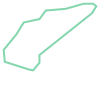

In [55]:
lakes.unary_union.geoms[0].exterior

In [56]:
import folium

In [57]:
folium.Icon?

In [49]:
type(lakes.unary_union)

shapely.geometry.multipolygon.MultiPolygon

In [47]:
lakes.unary_union.interior.coords.xy

AttributeError: 'MultiPolygon' object has no attribute 'interior'

In [6]:
# attribute table
import pandas as pd
print "Number of records in lakes: {}".format(len(lakes))
print "Number of unique REACHCODEs: {}".format(len(pd.unique(lakes.REACHCODE)))
#lakes.set_index('REACHCODE', inplace=True)
lakes.head()

Number of records in lakes: 807
Number of unique REACHCODEs: 797


,AREASQKM,COMID,ELEVATION,FCODE,FDATE,FTYPE,GNIS_ID,GNIS_NAME,REACHCODE,RESOLUTION,SHAPE_AREA,SHAPE_LENG,VPU,geometry
0,0.079,4562850,0.0,39004,1999-06-22,LakePond,None,None,16010202001481,Medium,0.000009,0.019938,16,"POLYGON ((-111.855203003485 41.90411666828982,..."
1,0.102,663806,0.0,39004,1999-06-22,LakePond,1446649,Tony Grove Lake,16010203000737,Medium,0.000011,0.015252,16,POLYGON ((-111.6456740038103 41.89611300163557...
2,0.036,663946,0.0,39004,1999-06-22,LakePond,None,None,16010203000755,Medium,0.000004,0.011745,16,POLYGON ((-111.7176358036986 41.75337126852378...
3,1.044,663954,1343.0,39010,1999-06-22,LakePond,None,None,16010203000753,Medium,0.000113,0.224490,16,"POLYGON ((-111.9423262033498 41.7297770685604,..."
4,0.037,663956,1343.0,39010,1999-06-22,LakePond,None,None,16010203000746,Medium,0.000004,0.010551,16,POLYGON ((-111.9461004700106 41.74514726853653...


In [ ]:
print type(lakes.FTYPE)
print lakes.FTYPE[0] # returns index in the series, change to index of REACHCODE above if that was index set

In [ ]:
print lakes.dtypes

In [ ]:
print lakes.index.dtype
print lakes.index

In [ ]:
print len(lakes)
lakes.plot()  #Visualize

In [ ]:
lakes.plot?

In [ ]:
lake = lakes.ix[lakes.COMID == 8914219] 
lake.plot()  # add figsize

In [ ]:
cats = gpd.GeoDataFrame.from_file("{}/NHDPlus16/NHDCatchment.shp".format(DL_dir))
basin = cats.ix[cats.FEATUREID.isin(range(8915961,8915984,2))]
print "Max area catchment: %s SQKM" % basin.AreaSqKM.max()
print "Min area catchment: %s SQKM" % basin.AreaSqKM.min()
print "Mean area of all catchments: %s SQKM" % basin.AreaSqKM.mean()
print "STD of all catchments: %s" % basin.AreaSqKM.std()
basin.plot(column='AreaSqKM', cmap="brg")

In [ ]:
sort_values()

In [ ]:
lakes.loc?

In [ ]:
lakes.loc[lakes['COMID'] == 4562850]
lakes.ix[lakes.COMID == 4562850]
lakes.ix[lakes.COMID.isin([4562850])]
lakes.query("COMID == 4562850")

In [ ]:
lakes.ix[lakes.COMID.isin([4562850])].plot()

In [ ]:
import matplotlib.pyplot as plt
#plt.style.use("default")
fig, ax = plt.subplots(1, figsize=(3.5,7))
base = lake.plot(ax=ax, color='blue')
basin.plot(ax=base, color='red') #
ax.axis('off')
ax.set_title("Plot of Lake with Catchment")

In [ ]:
basin.crs

In [ ]:
print type(basin['geometry'])
print type(basin.ix[1990].geometry) # key in on output from this
print basin.ix[1990].geometry.area
print basin.ix[1990].geometry.length
#convert to new crs for output in meteres
basin_albers = basin.to_crs({'init' :'epsg:5070'})
print basin_albers.ix[1990].geometry.area
print basin_albers.ix[1990].geometry.length

In [ ]:
#import sys
#import pandas as pd
#import geopandas as gpd
#from datetime import datetime as dt
from StreamCat_functions import findUpstreamNpy
DL_dir = r'/home/rick/Downloads/SpatialData'
zone = '16'
lakes = gpd.GeoDataFrame.from_file('%s/NHDPlus%s/NHDWaterbodies.shp' % (DL_dir, zone)).to_crs({'init' :'epsg:5070'})
cats = gpd.GeoDataFrame.from_file('%s/NHDPlus%s/NHDCatchment.shp' % (DL_dir, zone)).to_crs({'init' :'epsg:5070'}) 
lookup = pd.read_csv('%s/lookupCOMS%s.csv' % (DL_dir, zone))

lks = gpd.GeoDataFrame()
bsn = gpd.GeoDataFrame()
miss = gpd.GeoDataFrame()

for idx, row in lookup.iterrows():
    lake = lakes.ix[lakes.COMID == row.wbCOMID]
    catbas = findUpstreamNpy(zone, int(row.catCOMID), DL_dir)
    basin = cats.ix[cats.FEATUREID.isin(catbas)]
    try: 
        diffgeom = lake['geometry'].difference(basin.unary_union.buffer(0))
        pct = diffgeom.area / lake.area * 100
        if pct.values[0] > 20:
            lks = pd.concat([lks, lake])
            bsn = pd.concat([bsn, basin])
            miss = pd.concat([miss, gpd.GeoDataFrame(data={'COMID': row.wbCOMID,'PCT': pct}, geometry=diffgeom)])
    except:
        print row.wbCOMID
        continue
lks.to_crs({'init' :'epsg:4326'}).to_file(r"%s\lks.json" % DL_dir, driver="GeoJSON")
bsn.to_crs({'init' :'epsg:4326'}).to_file(r"%s\bsn.json" % DL_dir, driver="GeoJSON")
miss.to_crs({'init' :'epsg:4326'}).to_file(r"%s\miss.json" % DL_dir, driver="GeoJSON")
miss = miss.to_crs({'init' :'epsg:4326'})

In [ ]:
center_point = lakes.to_crs({'init' :'epsg:4326'}).unary_union.buffer(0).centroid
print center_point.x
print center_point.y

In [ ]:
extent = miss.unary_union.bounds
lat_Center = (extent[1] + extent[3]) / 2
lon_Center = (extent[0] + extent[2]) / 2

In [ ]:
miss = miss.to_crs({'init' :'epsg:4326'})

In [ ]:
miss.columns # use COMID in popup / and PCT for color and icon format

In [ ]:
def color(pct):
    if pct <= 50:
        col=('green','ok')
    elif 50 < pct <= 75:
        col=('blue','remove')
    elif pct > 75:
        col=('darkred','ban-circle')
    return col  

In [ ]:
folium.Icon?

In [ ]:
folium.Map?

In [ ]:
import folium
f_map=folium.Map(location=[lat_Center , lon_Center],zoom_start=6,tiles="Stamen Terrain", control_scale=True)
fg=folium.FeatureGroup(name="Lake Points")
for lat,lon,name,pct in zip(miss['geometry'].centroid.map(lambda p: p.y),miss['geometry'].centroid.map(lambda p: p.x),miss['COMID'],miss['PCT']):    
    fg.add_child(folium.Marker(location=[lat,lon],popup="NHD Waterbody COMID: %s" % int(name),
                                   icon=folium.Icon(icon_color='white', color=color(pct)[0], icon=color(pct)[1])))
f_map.add_child(fg)
f_map.add_child(folium.GeoJson(data=open(r'%s\lks.json' % DL_dir),
                name='NHD Lake',
                style_function=lambda x: {'fillColor':'blue', 
                                          'fill_opacity': 0.2, 
                                          'color':'none'}))
f_map.add_child(folium.GeoJson(data=open(r'%s\bsn.json' % DL_dir),
                name='Catchment Basin',
                style_function=lambda x: {'fillColor':'grey', 
                                          'fill_opacity': 0.74,
                                          'color':'white'}))
f_map.add_child(folium.GeoJson(data=open(r'%s\miss.json' % DL_dir),
                name='Missed Area',
                style_function=lambda x: {'fillColor':'red', 
                                          'fill_opacity': 0.2, 
                                          'color':'none'}))
f_map.add_child(folium.LayerControl())

In [ ]:
f_map.save(outfile=r'%s\lakesPoint.html' % DL_dir)

## Links to icons to use with markers
* [FontAwesome](http://fontawesome.io/icons/)
* [GlyphIcons](http://glyphicons.bootstrapcheatsheets.com/)

## Here is the map of all lakes with > 50% coverage
* # [All Over 50](http://debboutr.github.io/tot_1.html)

## [Notebook](https://anaconda.org/debboutr/lightning/notebook) of bokeh package
* # [Calapooia](http://debboutr.github.io/Calapooia_PolyCats.html)
* # [DC Road Density](http://debboutr.github.io/DC_Plot_rdDens.html)